<a href="https://colab.research.google.com/github/i880/HackerSanta/blob/main/emotion_facial_with_mini_xception.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip tensorflow.contrib.framework.python.ops.variables

ERROR: unknown command "tensorflow.contrib.framework.python.ops.variables"


In [2]:
!pip install keras

In [3]:
!wget https://github.com/oarriaga/face_classification/raw/master/trained_models/emotion_models/fer2013_mini_XCEPTION.102-0.66.hdf5 -O mini_xception.h5


--2025-05-18 17:25:24--  https://github.com/oarriaga/face_classification/raw/master/trained_models/emotion_models/fer2013_mini_XCEPTION.102-0.66.hdf5
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/oarriaga/face_classification/master/trained_models/emotion_models/fer2013_mini_XCEPTION.102-0.66.hdf5 [following]
--2025-05-18 17:25:24--  https://raw.githubusercontent.com/oarriaga/face_classification/master/trained_models/emotion_models/fer2013_mini_XCEPTION.102-0.66.hdf5
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 872856 (852K) [application/octet-stream]
Saving to: ‘mini_xception.h5’

mini_xcep

In [4]:
import cv2
import numpy as np
from keras.models import load_model

# Charger le modèle
model = load_model('mini_xception.h5', compile=False)

# Étiquettes des émotions
emotion_labels = ['Colère', 'Dégoût', 'Peur', 'Joie', 'Tristesse', 'Surprise', 'Neutre']

# Charger une image en niveaux de gris et la redimensionner
img = cv2.imread('chemin/vers/image.jpg', cv2.IMREAD_GRAYSCALE)
!wget https://raw.githubusercontent.com/opencv/opencv/master/samples/data/lena.jpg -O test.jpg
img = cv2.imread('test.jpg', cv2.IMREAD_GRAYSCALE)
face = cv2.resize(img, (64, 64))
face = face.astype('float32') / 255.0
face = np.expand_dims(face, axis=0)
face = np.expand_dims(face, axis=-1)

# Prédire l'émotion
prediction = model.predict(face)
emotion_idx = np.argmax(prediction)
emotion = emotion_labels[emotion_idx]

print(f"Émotion prédite : {emotion}")



--2025-05-18 17:25:37--  https://raw.githubusercontent.com/opencv/opencv/master/samples/data/lena.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 91814 (90K) [image/jpeg]
Saving to: ‘test.jpg’

test.jpg            100%[===================>]  89.66K  --.-KB/s    in 0.03s   

2025-05-18 17:25:37 (3.43 MB/s) - ‘test.jpg’ saved [91814/91814]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 602ms/step
Émotion prédite : Peur


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 422ms/step
Neutre
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Neutre
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
Neutre


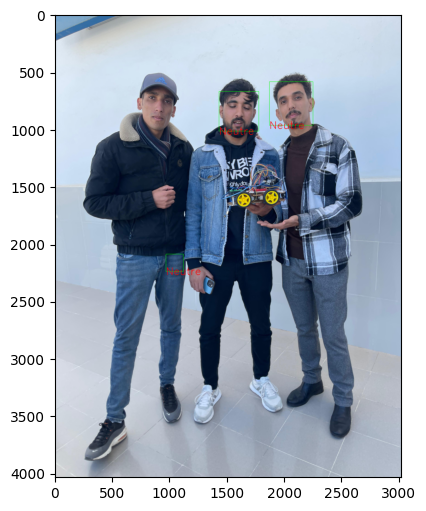

In [18]:
import numpy as np
import cv2
from keras.models import load_model

model = load_model('mini_xception.h5', compile=False)
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
emotion_labels = ['Colère', 'Dégoût', 'Peur', 'Joie', 'Tristesse', 'Surprise', 'Neutre']
img = cv2.imread('img3.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)


faces = face_cascade.detectMultiScale(gray, scaleFactor=1.3, minNeighbors=5)


for (x, y, w, h) in faces:

    face = gray[y:y+h, x:x+w]
    face = cv2.resize(face, (64, 64))
    face = face.astype('float32') / 255.0
    face = np.expand_dims(face, axis=0)
    face = np.expand_dims(face, axis=-1)


    prediction = model.predict(face)
    emotion_idx = np.argmax(prediction)
    emotion = emotion_labels[emotion_idx]
    print(emotion)


    cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2)

    cv2.putText(img, emotion, (x,  y + h + 30), cv2.FONT_HERSHEY_SIMPLEX, 3, (0,0,255), 3)


img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)


plt.figure(figsize=(6,6))
plt.imshow(img_rgb)
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 435ms/step


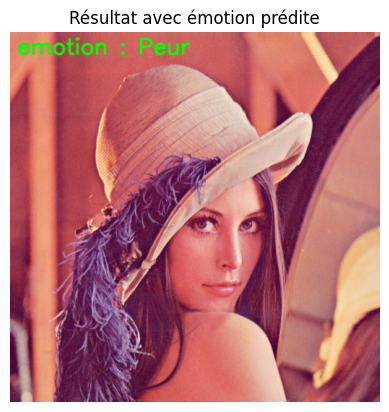

In [ ]:
import cv2
import numpy as np
from keras.models import load_model
import matplotlib.pyplot as plt

# Charger le modèle
model = load_model('mini_xception.h5', compile=False)

# Labels des émotions (en fonction de l’ordre du dataset FER2013)
emotion_labels = ['Colère', 'Dégoût', 'Peur', 'Joie', 'Tristesse', 'Surprise', 'Neutre']

# Lire l'image (en niveaux de gris pour le modèle + en couleur pour l'affichage)
gray_img = cv2.imread('test.jpg', cv2.IMREAD_GRAYSCALE)
color_img = cv2.imread('test.jpg')  # Pour affichage

# Redimensionner et préparer pour le modèle
face = cv2.resize(gray_img, (64, 64))
face = face.astype('float32') / 255.0
face = np.expand_dims(face, axis=0)
face = np.expand_dims(face, axis=-1)

# Prédire l’émotion
prediction = model.predict(face)
emotion_idx = np.argmax(prediction)
emotion = emotion_labels[emotion_idx]

# Écrire l’émotion sur l’image couleur
cv2.putText(
    color_img,
    f'emotion : {emotion}',
    (10, 30),  # Position du texte
    cv2.FONT_HERSHEY_SIMPLEX,
    1,  # Taille
    (0, 255, 0),  # Couleur (vert)
    2,  # Épaisseur
    cv2.LINE_AA
)

# Convertir BGR en RGB pour affichage avec matplotlib
color_img_rgb = cv2.cvtColor(color_img, cv2.COLOR_BGR2RGB)

# Afficher l’image
plt.imshow(color_img_rgb)
plt.axis('off')
plt.title("Résultat avec émotion prédite")
plt.show()


--2025-05-18 17:45:23--  https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_default.xml
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 930127 (908K) [text/plain]
Saving to: ‘haarcascade_frontalface_default.xml’

haarcascade_frontal 100%[===================>] 908.33K  --.-KB/s    in 0.06s   

2025-05-18 17:45:23 (14.2 MB/s) - ‘haarcascade_frontalface_default.xml’ saved [930127/930127]



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 421ms/step


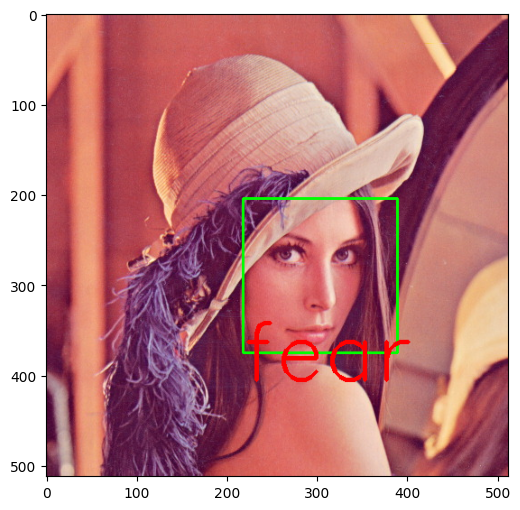

In [16]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from keras.models import load_model

# Charger le modèle d’émotion
model = load_model('mini_xception.h5', compile=False)
emotion_labels = ['anger', 'disgust', 'fear', 'joy', 'sadness', 'surprise', 'neutral']

# Télécharger le classificateur Haar (détecteur de visage)
!wget https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_default.xml

# Charger le classificateur de visage
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

# Charger l'image en niveaux de gris et en couleur
img = cv2.imread('test.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Détection des visages
faces = face_cascade.detectMultiScale(gray, scaleFactor=1.3, minNeighbors=5)

# Pour chaque visage détecté
for (x, y, w, h) in faces:
    # Extraire le visage détecté
    face = gray[y:y+h, x:x+w]
    face = cv2.resize(face, (64, 64))
    face = face.astype('float32') / 255.0
    face = np.expand_dims(face, axis=0)
    face = np.expand_dims(face, axis=-1)

    # Prédiction de l’émotion
    prediction = model.predict(face)
    emotion_idx = np.argmax(prediction)
    emotion = emotion_labels[emotion_idx]

    # Dessiner un rectangle autour du visage
    cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2)
    # Afficher l’émotion au-dessus du rectangle
    cv2.putText(img, emotion, (x,  y + h + 30), cv2.FONT_HERSHEY_SIMPLEX, 3, (0,0,255), 3)

# Convertir BGR en RGB pour affichage avec matplotlib
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Afficher le résultat
plt.figure(figsize=(6,6))
plt.imshow(img_rgb)
plt.show()


***MobileNet Face Detection***


In [20]:
!pip install tensorflow opencv-python numpy keras  matplotlib

In [23]:
import os
import cv2

# Create directory for models if it doesn't exist
os.makedirs('models', exist_ok=True)

# Download face detection models
print("Downloading face detection models...")
os.system('wget https://github.com/opencv/opencv/raw/master/data/haarcascades/haarcascade_frontalface_default.xml -O models/haarcascade_frontalface_default.xml')
os.system('wget https://raw.githubusercontent.com/opencv/opencv/master/samples/dnn/face_detector/deploy.prototxt -O models/deploy.prototxt')
os.system('wget https://github.com/opencv/opencv_3rdparty/raw/dnn_samples_face_detector_20170830/res10_300x300_ssd_iter_140000.caffemodel -O models/res10_300x300_ssd_iter_140000.caffemodel')

print("All models downloaded successfully!")

All models downloaded successfully!


with  one picture

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


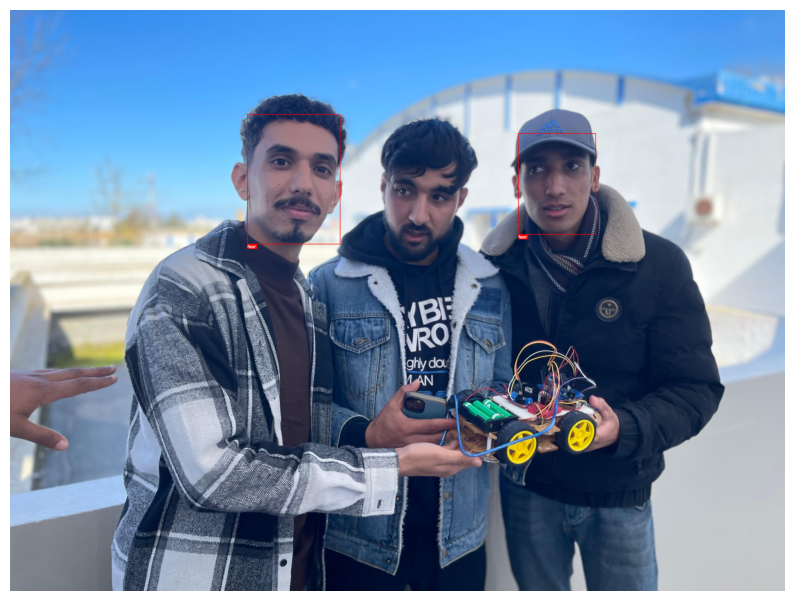

Result saved to output_result.jpg


In [34]:
import cv2
import numpy as np
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Flatten, Dropout
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2, preprocess_input
from tensorflow.keras.optimizers import Adam

# Emotion labels
EMOTIONS = ['angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral']

def load_models():
    """Load face detection and emotion recognition models"""
    # Face detection models
    face_cascade = cv2.CascadeClassifier('models/haarcascade_frontalface_default.xml')
    dnn_net = cv2.dnn.readNetFromCaffe("models/deploy.prototxt",
                                      "models/res10_300x300_ssd_iter_140000.caffemodel")

    # Emotion recognition model
    base_emotion = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
    emotion_model = Sequential([
        base_emotion,
        Flatten(),
        Dense(256, activation='relu'),
        Dropout(0.5),
        Dense(7, activation='softmax')
    ])

    # Load pre-trained weights (you should train this first or download pre-trained weights)
    # emotion_model.load_weights('models/emotion_model.h5')

    return face_cascade, dnn_net, emotion_model

def detect_faces(image, net, method='dnn'):
    """Detect faces using specified method"""
    if method == 'haar':
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        return face_cascade.detectMultiScale(gray, 1.3, 5)
    else:
        (h, w) = image.shape[:2]
        blob = cv2.dnn.blobFromImage(cv2.resize(image, (300, 300)), 1.0,
                                    (300, 300), (104.0, 177.0, 123.0))
        net.setInput(blob)
        detections = net.forward()
        faces = []
        for i in range(0, detections.shape[2]):
            confidence = detections[0, 0, i, 2]
            if confidence > 0.5:
                box = detections[0, 0, i, 3:7] * np.array([w, h, w, h])
                (startX, startY, endX, endY) = box.astype("int")
                faces.append((startX, startY, endX-startX, endY-startY))
        return faces

def process_image(image_path, face_cascade, dnn_net, emotion_model):
    """Process single image for emotion detection"""
    image = cv2.imread(image_path)
    if image is None:
        print(f"Error: Could not load image {image_path}")
        return None

    rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    faces = detect_faces(rgb_image, dnn_net)

    results = []
    for (x, y, w, h) in faces:
        face_roi = rgb_image[y:y+h, x:x+w]
        face_emotion = cv2.resize(face_roi, (224, 224))
        face_emotion = np.expand_dims(face_emotion, axis=0)
        face_emotion = preprocess_input(face_emotion)

        emotion_pred = emotion_model.predict(face_emotion)
        emotion_label = EMOTIONS[np.argmax(emotion_pred)]

        results.append({
            'box': (x, y, w, h),
            'emotion': emotion_label,
            'emotion_prob': {e: float(p) for e, p in zip(EMOTIONS, emotion_pred[0])}
        })

    return results, rgb_image

def display_results(image, results, output_path=None):
    """Display image with detection results"""
    output_image = image.copy()

    for result in results:
        x, y, w, h = result['box']

        # Draw rectangle
        cv2.rectangle(output_image, (x, y), (x+w, y+h), (255, 0, 0), 2)

        # Prepare text
        text = f"{result['emotion']}"
        text_y = y + h + 20

        # Draw text background
        (text_width, text_height), _ = cv2.getTextSize(text,
                                                     cv2.FONT_HERSHEY_SIMPLEX,
                                                     0.7, 2)
        cv2.rectangle(output_image,
                     (x, text_y - text_height - 5),
                     (x + text_width + 5, text_y + 5),
                     (255, 0, 0), -1)

        # Put text
        cv2.putText(output_image, text,
                   (x, text_y),
                   cv2.FONT_HERSHEY_SIMPLEX,
                   0.7, (255, 255, 255), 2)

    # Save or display
    if output_path:
        cv2.imwrite(output_path, cv2.cvtColor(output_image, cv2.COLOR_RGB2BGR))

        import matplotlib.pyplot as plt
        plt.figure(figsize=(10, 10))
        plt.imshow(output_image)
        plt.axis('off')
        plt.show()
        print(f"Result saved to {output_path}")
    else:
        print("could not see faces ")

if __name__ == "__main__":
    # Load models
    face_cascade, dnn_net, emotion_model = load_models()

    # Example usage
    image_path = "img2.jpg"  # Replace with your image path
    results, image = process_image(image_path, face_cascade, dnn_net, emotion_model)

    if results:
        display_results(image, results, "output_result.jpg")

now lets do it in  realtime